# 1. Viral infection

Saved results as pkl
Saved results as npy


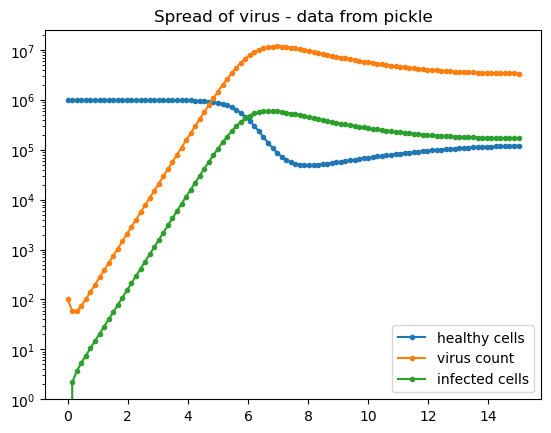

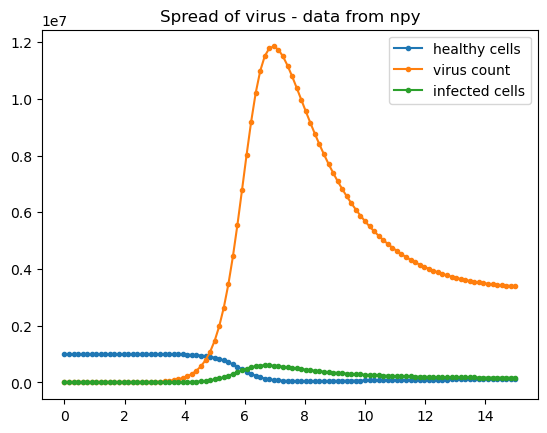

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import pickle

def func(t, x, r1, r2, r3, r4, r5, r6):
    H, V, I = x
    dhdt = r1 - r2 * H - r3 * H * V
    dvdt = -r3 * H * V -r4 * V + r5 * I
    didt = r3 * H * V -r6 * I

    return dhdt, dvdt, didt

r1, r2, r3, r4, r5, r6 = 1e5, 1e-1, 2e-7, 5, 1e2, 5e-1
T = 15
H0, V0, I0 = 1e6, 1e2, 0
t = np.linspace(0, T, 100)
sol = solve_ivp(func, [0, T], [H0, V0, I0], t_eval=t, method='LSODA', args=(r1, r2, r3, r4, r5, r6))
results = {'time': t, 'healthy cells': sol.y[0], 'virus count': sol.y[1], 'infected cells': sol.y[2] }

# Save the results
with open('virus_spread.pkl', 'wb') as f:
    pickle.dump(results, f, protocol=pickle.HIGHEST_PROTOCOL)
print('Saved results as pkl')

np.save('virus_spread.npy', [results], allow_pickle=True)
print('Saved results as npy')
# Load and plot the results
pickle_results = None
with open('virus_spread.pkl', 'rb') as f:
    pickle_results = pickle.load(f)
plt.plot(pickle_results['time'], pickle_results['healthy cells'], marker='.', label='healthy cells')
plt.plot(pickle_results['time'], pickle_results['virus count'], marker='.', label='virus count')
plt.plot(pickle_results['time'], pickle_results['infected cells'], marker='.', label='infected cells')
plt.yscale('log')
plt.title(f'Spread of virus - data from pickle')
plt.legend()
plt.show()

npy_results = np.load('virus_spread.npy', allow_pickle=True)[0]
#print(npy_results['healthy cells'])
plt.plot(npy_results['time'], npy_results['healthy cells'], marker='.', label='healthy cells')
plt.plot(npy_results['time'], npy_results['virus count'], marker='.', label='virus count')
plt.plot(npy_results['time'], npy_results['infected cells'], marker='.', label='infected cells')
#plt.yscale('log')
plt.title(f'Spread of virus - data from npy')
plt.legend()
plt.show()


# 2. Series

In [2]:
import csv

def series(x, n):
    s = []
    sum = 0
    for i in range(n+1):
        term = x**-i
        s.append(term)
        sum += term
    s.append(sum)
    return s

n = 10
heads = ['x']
for i in range(n+1):
    heads.append(i)
heads.append('sum')
data = []
for i in range(2,n+1):
    row = [i] + series(i, n)
    data.append(row)
print(heads)
print(data)
with open('series.csv', 'w') as csvfile:
    csvwriter = csv.writer(csvfile)

    csvwriter.writerow(heads)
    csvwriter.writerows(data)

['x', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 'sum']
[[2, 1, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625, 1.9990234375], [3, 1, 0.3333333333333333, 0.1111111111111111, 0.037037037037037035, 0.012345679012345678, 0.00411522633744856, 0.0013717421124828531, 0.0004572473708276177, 0.00015241579027587258, 5.080526342529086e-05, 1.6935087808430286e-05, 1.499991532456096], [4, 1, 0.25, 0.0625, 0.015625, 0.00390625, 0.0009765625, 0.000244140625, 6.103515625e-05, 1.52587890625e-05, 3.814697265625e-06, 9.5367431640625e-07, 1.3333330154418945], [5, 1, 0.2, 0.04, 0.008, 0.0016, 0.00032, 6.4e-05, 1.28e-05, 2.56e-06, 5.12e-07, 1.024e-07, 1.2499999744], [6, 1, 0.16666666666666666, 0.027777777777777776, 0.004629629629629629, 0.0007716049382716049, 0.0001286008230452675, 2.143347050754458e-05, 3.5722450845907635e-06, 5.953741807651273e-07, 9.92290301275212e-08, 1.65381716879202e-08, 1.1999999966923656], [7, 1, 0.14285714285714285, 0.02040816326530612, 0.0029

# 3. Import csv

In [3]:
import pandas as pd

df = pd.read_csv('series.csv', index_col='x')
print(f'{df.iloc[5, 0:3]}')


0    1.000000
1    0.142857
2    0.020408
Name: 7, dtype: float64


# 4. IPL

In [4]:
ipl_df = pd.read_csv("ipl_data.csv")
#print(ipl_df.describe())
#print(ipl_df.head())

small_df = ipl_df[['season', 'city', 'winner']]

print('i) ' + '#'*10 + ' Printing smaller dataframe ' + '#'*10)
print(small_df.head())

kkr_2010inkk = ipl_df[ (ipl_df['season']==2010) & (ipl_df['city']=='Kolkata') & ((ipl_df['team1']=='Kolkata Knight Riders') | (ipl_df['team2']=='Kolkata Knight Riders'))]
print('\n\nii) ' + '#'*10 + ' KKR in 2010 in Kolkata ' + '#'*10)
print(kkr_2010inkk[['team1', 'team2', 'winner']])
print()
print(f'KKR was the winner in {(kkr_2010inkk['winner'] == 'Kolkata Knight Riders').sum()} matches')
print(f'KKR was the loser in {(kkr_2010inkk['winner'] != 'Kolkata Knight Riders').sum()} matches')


i) ########## Printing smaller dataframe ##########
   season        city                       winner
0    2008   Bangalore        Kolkata Knight Riders
1    2008  Chandigarh          Chennai Super Kings
2    2008       Delhi             Delhi Daredevils
3    2008      Mumbai  Royal Challengers Bangalore
4    2008     Kolkata        Kolkata Knight Riders


ii) ########## KKR in 2010 in Kolkata ##########
                           team1                  team2                 winner
118  Royal Challengers Bangalore  Kolkata Knight Riders  Kolkata Knight Riders
122          Chennai Super Kings  Kolkata Knight Riders    Chennai Super Kings
144        Kolkata Knight Riders        Deccan Chargers  Kolkata Knight Riders
148        Kolkata Knight Riders        Kings XI Punjab        Kings XI Punjab
153        Kolkata Knight Riders       Delhi Daredevils  Kolkata Knight Riders
167             Rajasthan Royals  Kolkata Knight Riders  Kolkata Knight Riders
170               Mumbai Indians  Kolk

     win_by_runs  win_by_wickets
115           11               0
116            4               0
117            0               5
118            0               7
119           31               0


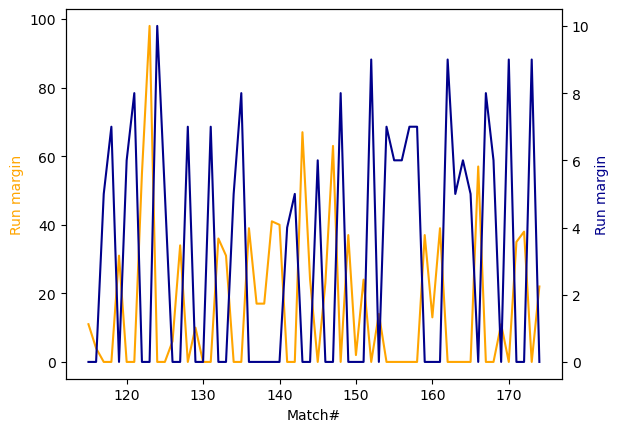

In [15]:
def plot_winning_margin(season):
    season_matches = ipl_df[ipl_df['season']==season][['win_by_runs', 'win_by_wickets']]
    print(season_matches.head())

    fig,ax1 = plt.subplots()
    ax1.set_xlabel('Match#')
    ax1.set_ylabel('Run margin', color='orange')
    ax1.plot(season_matches['win_by_runs'], color='orange')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Run margin', color='darkblue')
    ax2.plot(season_matches['win_by_wickets'], color='darkblue')
plot_winning_margin(2010)